# Customer retention strategies in e-commerce: Insights from purchasing intention data

In [1]:
# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_retention.csv')
df

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,28-09-2012,11-08-2013 00:00,11-08-2013 00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,19-12-2010,01-04-2011 00:00,19-01-2014 00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,03-10-2010,01-12-2010 00:00,06-07-2011 00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,22-10-2010,28-03-2011 00:00,28-03-2011 00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,27-11-2010,29-11-2010 00:00,28-01-2013 00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30796,24CY2D,1,17-01-2018,17-01-2018 00:00,17-01-2018 00:00,6,83.333333,16.666667,55.68,0.000000,1,0,1,Friday,MAA
30797,YQK8BU,1,17-01-2018,17-01-2018 00:00,17-01-2018 00:00,13,69.230769,7.692308,35.00,0.000000,1,0,0,Saturday,MAA
30798,TFQRQP,1,17-01-2018,17-01-2018 00:00,21-01-2018 00:00,8,75.000000,37.500000,52.03,0.500000,1,1,0,Saturday,MAA
30799,ZTXM5Y,1,17-01-2018,17-01-2018 00:00,17-01-2018 00:00,6,33.333333,0.000000,40.20,0.000000,1,0,0,Friday,BOM


In [4]:
df.shape

(30801, 15)

In [5]:
#data preprocessing

In [6]:
#Dropping unnecessary columns

In [7]:
 df = df.drop(['custid'], axis = 1)

In [8]:
# checking null values

In [9]:
df.isnull().sum()

retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

<AxesSubplot:xlabel='retained', ylabel='count'>

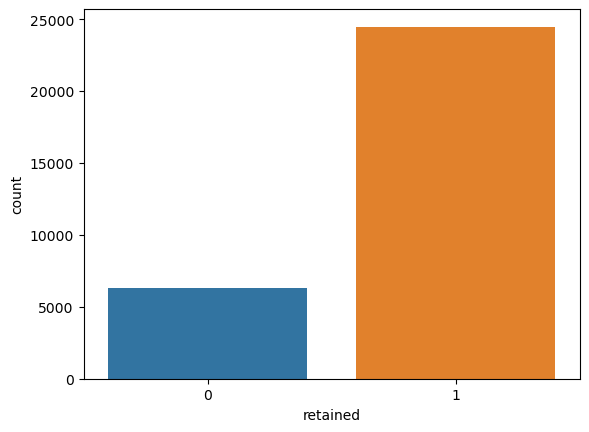

In [10]:
sns.countplot(x = df['retained'])

In [11]:
# standard scaling

In [12]:
numeric_columns = ['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [13]:
categorical_columns = ['favday', 'city']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [14]:
df['created'] = pd.to_datetime(df['created'], format='%d-%m-%Y')
df['firstorder'] = pd.to_datetime(df['firstorder'], format='%d-%m-%Y %H:%M', errors='coerce')
df['lastorder'] = pd.to_datetime(df['lastorder'], format='%d-%m-%Y %H:%M', errors='coerce')

In [15]:
df.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,...,doorstep,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
0,0,2012-09-28,2013-08-11,2013-08-11,0.051435,2.518730,-0.210468,-1.154779,-0.363018,0,...,0,1,0,0,0,0,0,0,1,0
1,1,2010-12-19,2011-04-01,2014-01-19,3.991473,2.269432,0.459704,0.532009,1.384700,1,...,1,0,0,0,0,0,0,0,1,0
2,0,2010-10-03,2010-12-01,2011-07-06,-1.679794,-0.864606,-0.536962,-0.689980,0.213406,0,...,0,0,0,0,0,0,1,0,1,0
3,0,2010-10-22,2011-03-28,2011-03-28,-1.679794,-0.864606,-0.536962,-0.168604,-0.363018,0,...,0,0,0,0,1,0,0,1,0,0
4,1,2010-11-27,2010-11-29,2013-01-28,0.111133,2.180396,0.725481,1.220186,-0.277869,0,...,0,1,0,0,0,0,0,1,0,0


In [16]:
df['created_year'] = df['created'].dt.year
df['created_month'] = df['created'].dt.month
df['created_day'] = df['created'].dt.day
df = df.drop(['created'], axis = 1)

df['firstorder_year'] = df['firstorder'].dt.year
df['firstorder_month'] = df['firstorder'].dt.month
df['firstorder_day'] = df['firstorder'].dt.day
df = df.drop(['firstorder'], axis = 1)

df['lastorder_year'] = df['lastorder'].dt.year
df['lastorder_month'] = df['lastorder'].dt.month
df['lastorder_day'] = df['lastorder'].dt.day
df = df.drop(['lastorder'], axis = 1)

In [17]:
# clearing nullvalues with 0

In [19]:
df=df.fillna(0)

In [20]:
df.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday_Monday,...,city_MAA,created_year,created_month,created_day,firstorder_year,firstorder_month,firstorder_day,lastorder_year,lastorder_month,lastorder_day
0,0,0.051435,2.518730,-0.210468,-1.154779,-0.363018,0,0,0,1,...,0,2012.0,9.0,28.0,2013.0,8.0,11.0,2013.0,8.0,11.0
1,1,3.991473,2.269432,0.459704,0.532009,1.384700,1,1,1,0,...,0,2010.0,12.0,19.0,2011.0,4.0,1.0,2014.0,1.0,19.0
2,0,-1.679794,-0.864606,-0.536962,-0.689980,0.213406,0,0,0,0,...,0,2010.0,10.0,3.0,2010.0,12.0,1.0,2011.0,7.0,6.0
3,0,-1.679794,-0.864606,-0.536962,-0.168604,-0.363018,0,0,0,0,...,0,2010.0,10.0,22.0,2011.0,3.0,28.0,2011.0,3.0,28.0
4,1,0.111133,2.180396,0.725481,1.220186,-0.277869,0,0,0,1,...,0,2010.0,11.0,27.0,2010.0,11.0,29.0,2013.0,1.0,28.0


In [21]:
x = df.drop(['retained'],axis = 1)
x

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday_Monday,favday_Saturday,...,city_MAA,created_year,created_month,created_day,firstorder_year,firstorder_month,firstorder_day,lastorder_year,lastorder_month,lastorder_day
0,0.051435,2.518730,-0.210468,-1.154779,-0.363018,0,0,0,1,0,...,0,2012.0,9.0,28.0,2013.0,8.0,11.0,2013.0,8.0,11.0
1,3.991473,2.269432,0.459704,0.532009,1.384700,1,1,1,0,0,...,0,2010.0,12.0,19.0,2011.0,4.0,1.0,2014.0,1.0,19.0
2,-1.679794,-0.864606,-0.536962,-0.689980,0.213406,0,0,0,0,0,...,0,2010.0,10.0,3.0,2010.0,12.0,1.0,2011.0,7.0,6.0
3,-1.679794,-0.864606,-0.536962,-0.168604,-0.363018,0,0,0,0,0,...,0,2010.0,10.0,22.0,2011.0,3.0,28.0,2011.0,3.0,28.0
4,0.111133,2.180396,0.725481,1.220186,-0.277869,0,0,0,1,0,...,0,2010.0,11.0,27.0,2010.0,11.0,29.0,2013.0,1.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30796,-1.321608,1.954841,1.041092,-0.151046,-0.363018,1,0,1,0,0,...,1,2018.0,1.0,17.0,2018.0,1.0,17.0,2018.0,1.0,17.0
30797,-0.903726,1.477704,0.191371,-0.655351,-0.363018,1,0,0,0,1,...,1,2018.0,1.0,17.0,2018.0,1.0,17.0,2018.0,1.0,17.0
30798,-1.202213,1.672896,3.013659,-0.240056,4.447905,1,1,0,0,1,...,1,2018.0,1.0,17.0,2018.0,1.0,17.0,2018.0,1.0,21.0
30799,-1.321608,0.263173,-0.536962,-0.528544,-0.363018,1,0,0,0,0,...,0,2018.0,1.0,17.0,2018.0,1.0,17.0,2018.0,1.0,17.0


In [22]:
x.columns

Index(['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq', 'paperless',
       'refill', 'doorstep', 'favday_Monday', 'favday_Saturday',
       'favday_Sunday', 'favday_Thursday', 'favday_Tuesday',
       'favday_Wednesday', 'city_BOM', 'city_DEL', 'city_MAA', 'created_year',
       'created_month', 'created_day', 'firstorder_year', 'firstorder_month',
       'firstorder_day', 'lastorder_year', 'lastorder_month', 'lastorder_day'],
      dtype='object')

In [23]:
y = df['retained']
y

0        0
1        1
2        0
3        0
4        1
        ..
30796    1
30797    1
30798    1
30799    1
30800    1
Name: retained, Length: 30801, dtype: int64

In [24]:
x.isnull().sum()

esent               0
eopenrate           0
eclickrate          0
avgorder            0
ordfreq             0
paperless           0
refill              0
doorstep            0
favday_Monday       0
favday_Saturday     0
favday_Sunday       0
favday_Thursday     0
favday_Tuesday      0
favday_Wednesday    0
city_BOM            0
city_DEL            0
city_MAA            0
created_year        0
created_month       0
created_day         0
firstorder_year     0
firstorder_month    0
firstorder_day      0
lastorder_year      0
lastorder_month     0
lastorder_day       0
dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

# Extra Trees Classifier Model

In [24]:
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [25]:
# Model testing

In [26]:
pred1 = clf.predict(X_test)

In [27]:
# Model evalution

In [28]:
accuracy = accuracy_score(y_test, pred1)*100
print('Extra Tree Classifier accuracy: {}%'.format(accuracy))

Extra Tree Classifier accuracy: 96.75377373802954%


In [29]:
report = classification_report(y_test, pred1)
print("classification report for Extra Tree Classifier:\n ",report)

classification report for Extra Tree Classifier:
                precision    recall  f1-score   support

           0       0.96      0.88      0.92      1286
           1       0.97      0.99      0.98      4875

    accuracy                           0.97      6161
   macro avg       0.97      0.93      0.95      6161
weighted avg       0.97      0.97      0.97      6161



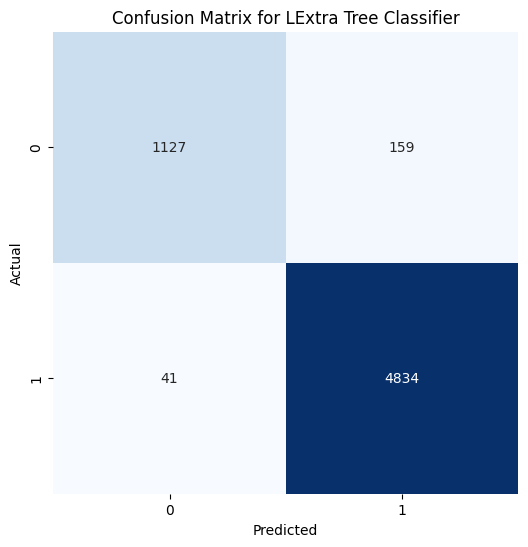

In [30]:
cm = confusion_matrix(y_test, pred1)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LExtra Tree Classifier')
plt.show()

# RandomForestClassifier

## Model Building

In [31]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
## Model Testing

In [33]:
y_pred1 = rfc.predict(X_test)

In [34]:
# Model Evalution

In [35]:
accuracy = accuracy_score(y_test, y_pred1)*100
print('RandomForest Classifier accuracy: {}%'.format(accuracy))

RandomForest Classifier accuracy: 97.07839636422658%


In [36]:
report = classification_report(y_test, y_pred1)
print("classification report for RandomForest Classifier:\n ",report)

classification report for RandomForest Classifier:
                precision    recall  f1-score   support

           0       0.96      0.90      0.93      1286
           1       0.97      0.99      0.98      4875

    accuracy                           0.97      6161
   macro avg       0.97      0.94      0.95      6161
weighted avg       0.97      0.97      0.97      6161



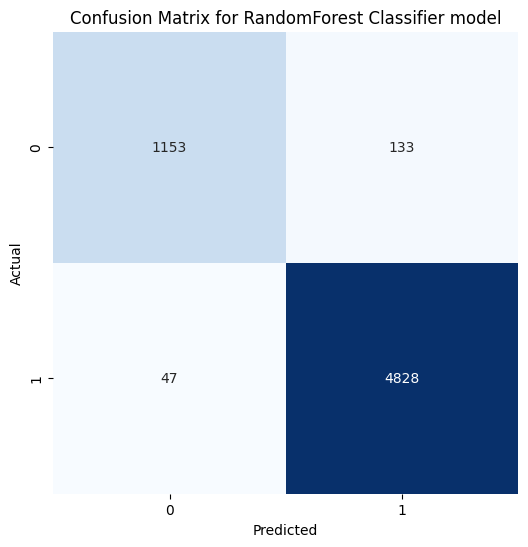

In [37]:
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForest Classifier model')
plt.show()

In [38]:
#prediction

In [39]:
test=pd.read_csv('test.csv')

In [40]:
test

,custid,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,28-09-2012,11-08-2013 00:00,11-08-2013 00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,19-12-2010,01-04-2011 00:00,19-01-2014 00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,03-10-2010,01-12-2010 00:00,06-07-2011 00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,22-10-2010,28-03-2011 00:00,28-03-2011 00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,27-11-2010,29-11-2010 00:00,28-01-2013 00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM
5,2B6B83,17-11-2008,12-10-2010 00:00,14-01-2014 00:00,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL
6,99XGVM,24-01-2011,16-05-2011 00:00,16-01-2014 00:00,60,43.333333,6.666667,116.55,0.125000,0,1,0,Friday,BOM
7,U3MP5L,04-12-2009,21-09-2011 00:00,16-01-2014 00:00,64,28.125000,15.625000,68.10,0.040094,1,1,0,Friday,DEL
8,ELKAGQ,18-09-2010,09-11-2010 00:00,09-11-2010 00:00,45,0.000000,0.000000,46.60,0.000000,0,0,0,Wednesday,DEL
9,3SBQP2,29-12-2010,20-02-2011 00:00,10-12-2013 00:00,34,94.117647,8.823529,66.07,0.133789,1,0,0,Monday,DEL


In [41]:
test = test.drop(['custid'], axis = 1)

In [42]:

numeric_columns = ['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq']
scaler = StandardScaler()
test[numeric_columns] = scaler.fit_transform(test[numeric_columns])

In [43]:
categorical_columns = ['favday', 'city']
test = pd.get_dummies(test, columns=categorical_columns, drop_first=True)


In [44]:
test['created'] = pd.to_datetime(test['created'], format='%d-%m-%Y')

In [45]:
test['firstorder'] = pd.to_datetime(test['firstorder'], format='%d-%m-%Y %H:%M', errors='coerce')

In [46]:

test['lastorder'] = pd.to_datetime(test['lastorder'], format='%d-%m-%Y %H:%M', errors='coerce')

In [47]:
test

,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday_Monday,favday_Saturday,favday_Sunday,favday_Thursday,favday_Tuesday,favday_Wednesday,city_BOM,city_DEL,city_MAA
0,2012-09-28,2013-08-11,2013-08-11,-0.345710,1.988315,-0.329706,-1.632640,-1.147622,0,0,0,1,0,0,0,0,0,0,1,0
1,2010-12-19,2011-04-01,2014-01-19,2.497044,1.773331,0.465882,0.161334,2.332507,1,1,1,0,0,0,0,0,0,0,1,0
2,2010-10-03,2010-12-01,2011-07-06,-1.594798,-0.929319,-0.717300,-1.138305,0.000177,0,0,0,0,0,0,0,0,1,0,1,0
3,2010-10-22,2011-03-28,2011-03-28,-1.594798,-0.929319,-0.717300,-0.583800,-1.147622,0,0,0,0,0,0,1,0,0,1,0,0
4,2010-11-27,2010-11-29,2013-01-28,-0.302638,1.696551,0.781397,0.893240,-0.978070,0,0,0,1,0,0,0,0,0,1,0,0
5,2008-11-17,2010-10-12,2014-01-14,0.386515,1.417473,0.993169,2.532119,1.557237,1,1,0,0,0,0,0,0,1,0,1,0
6,2011-01-24,2011-05-16,2014-01-16,0.989523,0.334989,0.032049,1.013582,1.247305,0,1,0,0,0,0,0,0,0,1,0,0
7,2009-12-04,2011-09-21,2014-01-16,1.161811,-0.108734,1.038985,-0.243004,-0.379438,1,1,0,0,0,0,0,0,0,0,1,0
8,2010-09-18,2010-11-09,2010-11-09,0.343443,-0.929319,-0.717300,-0.800622,-1.147622,0,0,0,0,0,0,0,0,1,0,1,0
9,2010-12-29,2011-02-20,2013-12-10,-0.130350,1.816689,0.274485,-0.295654,1.415698,1,0,0,1,0,0,0,0,0,0,1,0


In [48]:
test['created_year'] = test['created'].dt.year
test['created_month'] = test['created'].dt.month
test['created_day'] = test['created'].dt.day
test = test.drop(['created'], axis = 1)

test['firstorder_year'] = test['firstorder'].dt.year
test['firstorder_month'] = test['firstorder'].dt.month
test['firstorder_day'] = test['firstorder'].dt.day
test= test.drop(['firstorder'], axis = 1)

test['lastorder_year'] = test['lastorder'].dt.year
test['lastorder_month'] = test['lastorder'].dt.month
test['lastorder_day'] = test['lastorder'].dt.day
test = test.drop(['lastorder'], axis = 1)

In [49]:
test

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday_Monday,favday_Saturday,...,city_MAA,created_year,created_month,created_day,firstorder_year,firstorder_month,firstorder_day,lastorder_year,lastorder_month,lastorder_day
0,-0.345710,1.988315,-0.329706,-1.632640,-1.147622,0,0,0,1,0,...,0,2012,9,28,2013,8,11,2013,8,11
1,2.497044,1.773331,0.465882,0.161334,2.332507,1,1,1,0,0,...,0,2010,12,19,2011,4,1,2014,1,19
2,-1.594798,-0.929319,-0.717300,-1.138305,0.000177,0,0,0,0,0,...,0,2010,10,3,2010,12,1,2011,7,6
3,-1.594798,-0.929319,-0.717300,-0.583800,-1.147622,0,0,0,0,0,...,0,2010,10,22,2011,3,28,2011,3,28
4,-0.302638,1.696551,0.781397,0.893240,-0.978070,0,0,0,1,0,...,0,2010,11,27,2010,11,29,2013,1,28
5,0.386515,1.417473,0.993169,2.532119,1.557237,1,1,0,0,0,...,0,2008,11,17,2010,10,12,2014,1,14
6,0.989523,0.334989,0.032049,1.013582,1.247305,0,1,0,0,0,...,0,2011,1,24,2011,5,16,2014,1,16
7,1.161811,-0.108734,1.038985,-0.243004,-0.379438,1,1,0,0,0,...,0,2009,12,4,2011,9,21,2014,1,16
8,0.343443,-0.929319,-0.717300,-0.800622,-1.147622,0,0,0,0,0,...,0,2010,9,18,2010,11,9,2010,11,9
9,-0.130350,1.816689,0.274485,-0.295654,1.415698,1,0,0,1,0,...,0,2010,12,29,2011,2,20,2013,12,10


In [50]:
test.columns

Index(['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq', 'paperless',
       'refill', 'doorstep', 'favday_Monday', 'favday_Saturday',
       'favday_Sunday', 'favday_Thursday', 'favday_Tuesday',
       'favday_Wednesday', 'city_BOM', 'city_DEL', 'city_MAA', 'created_year',
       'created_month', 'created_day', 'firstorder_year', 'firstorder_month',
       'firstorder_day', 'lastorder_year', 'lastorder_month', 'lastorder_day'],
      dtype='object')

In [51]:
prediction=rfc.predict(test)

In [52]:
prediction

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)